# Imports

In [ ]:
!pip install opendatasets
!pip install pandas-profiling[notebook]
!pip install optuna
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.9/345.9 kB 27.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 17.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 852.6 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 18.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 22.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.7/33.7 MB 16.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 33.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 365.7/365.7 kB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.9/212.9 kB 26.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 297.6 kB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 10.3 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from pandas_profiling import ProfileReport
import seaborn as sns
from sklearn.impute import SimpleImputer
import opendatasets as od
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier
import xgboost as xgb
import catboost as cb
from xgboost import XGBClassifier
import optuna
from sklearn.metrics import accuracy_score, roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay, recall_score, f1_score
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score




# EDA




In [ ]:
dataset_url = 'https://www.kaggle.com/competitions/spaceship-titanic/data'
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: izabelamatusiewicz
Your Kaggle Key: ··········


100%|██████████| 299k/299k [00:00<00:00, 55.6MB/s]


Extracting archive ./spaceship-titanic/spaceship-titanic.zip to ./spaceship-titanic


In [ ]:
sample_submission = pd.read_csv("/content/spaceship-titanic/sample_submission.csv")
sample_submission.info()
print("---------------------------------------------")
sample_submission.describe()
print("---------------------------------------------")
print("Null count")
sample_submission.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PassengerId  4277 non-null   object
 1   Transported  4277 non-null   bool  
dtypes: bool(1), object(1)
memory usage: 37.7+ KB
---------------------------------------------
---------------------------------------------
Null count


PassengerId    0
Transported    0
dtype: int64

In [ ]:
sample_submission.head()

,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,False
3,0021_01,False
4,0023_01,False


In [ ]:
test = pd.read_csv("/content/spaceship-titanic/test.csv")
train = pd.read_csv("/content/spaceship-titanic/train.csv")
print(test.describe())

               Age   RoomService     FoodCourt  ShoppingMall           Spa  \
count  4186.000000   4195.000000   4171.000000   4179.000000   4176.000000   
mean     28.658146    219.266269    439.484296    177.295525    303.052443   
std      14.179072    607.011289   1527.663045    560.821123   1117.186015   
min       0.000000      0.000000      0.000000      0.000000      0.000000   
25%      19.000000      0.000000      0.000000      0.000000      0.000000   
50%      26.000000      0.000000      0.000000      0.000000      0.000000   
75%      37.000000     53.000000     78.000000     33.000000     50.000000   
max      79.000000  11567.000000  25273.000000   8292.000000  19844.000000   

             VRDeck  
count   4197.000000  
mean     310.710031  
std     1246.994742  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%       36.000000  
max    22272.000000  


In [ ]:
test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [ ]:
print(train.describe())

               Age   RoomService     FoodCourt  ShoppingMall           Spa  \
count  8514.000000   8512.000000   8510.000000   8485.000000   8510.000000   
mean     28.827930    224.687617    458.077203    173.729169    311.138778   
std      14.489021    666.717663   1611.489240    604.696458   1136.705535   
min       0.000000      0.000000      0.000000      0.000000      0.000000   
25%      19.000000      0.000000      0.000000      0.000000      0.000000   
50%      27.000000      0.000000      0.000000      0.000000      0.000000   
75%      38.000000     47.000000     76.000000     27.000000     59.000000   
max      79.000000  14327.000000  29813.000000  23492.000000  22408.000000   

             VRDeck  
count   8505.000000  
mean     304.854791  
std     1145.717189  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%       46.000000  
max    24133.000000  


In [ ]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [ ]:
train.Transported.value_counts()

True     4378
False    4315
Name: Transported, dtype: int64

In [ ]:
# Train dataset details
%%time
def viz(x):
    y=x.dtypes
    z=pd.DataFrame(y,columns=["data types"])
    z['Missing']=x.isnull().sum()
    z['Unique']=x.nunique()
    
    return z

viz(train).style.background_gradient(cmap='cubehelix_r')

CPU times: user 47.2 ms, sys: 0 ns, total: 47.2 ms
Wall time: 50.5 ms


,data types,Missing,Unique
PassengerId,object,0,8693
HomePlanet,object,201,3
CryoSleep,object,217,2
Cabin,object,199,6560
Destination,object,182,3
Age,float64,179,80
VIP,object,203,2
RoomService,float64,181,1273
FoodCourt,float64,183,1507
ShoppingMall,float64,208,1115


In [ ]:
# Test dataset details
%%time
viz(test).style.background_gradient(cmap='cubehelix_r')

CPU times: user 16.3 ms, sys: 814 µs, total: 17.2 ms
Wall time: 20.9 ms


,data types,Missing,Unique
PassengerId,object,0,4277
HomePlanet,object,87,3
CryoSleep,object,93,2
Cabin,object,100,3265
Destination,object,92,3
Age,float64,91,79
VIP,object,93,2
RoomService,float64,82,842
FoodCourt,float64,106,902
ShoppingMall,float64,98,715


# Visualizations

## Selected features viz

CPU times: user 838 ms, sys: 127 ms, total: 966 ms
Wall time: 843 ms


<Axes: xlabel='VRDeck', ylabel='Count'>

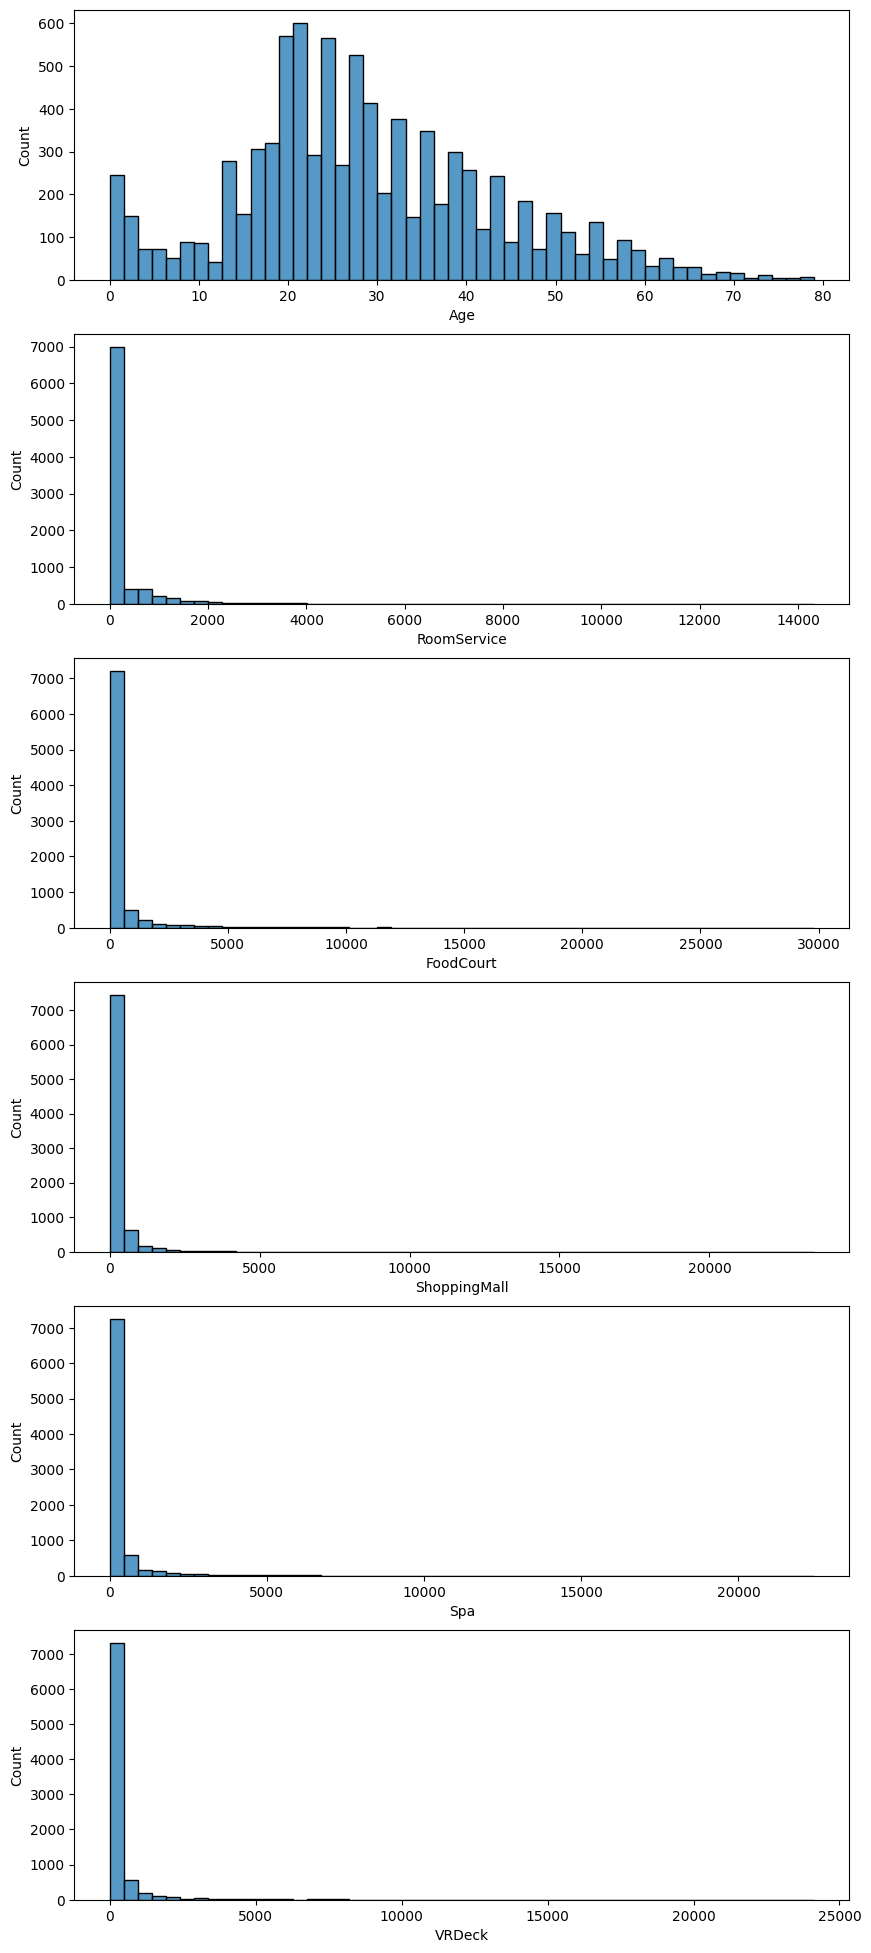

In [ ]:
# Numeric values visualization
%%time
fig, ax = plt.subplots(6,1,  figsize=(10, 10))
plt.subplots_adjust(top = 2)

sns.histplot(train['Age'], bins=50, ax=ax[0]);
sns.histplot(train['RoomService'], bins=50, ax=ax[1]);
sns.histplot(train['FoodCourt'], bins=50, ax=ax[2]);
sns.histplot(train['ShoppingMall'], bins=50, ax=ax[3]);
sns.histplot(train['Spa'], bins=50, ax=ax[4]);
sns.histplot(train['VRDeck'], bins=50, ax=ax[5]);

## Correlation

CPU times: user 136 ms, sys: 73.8 ms, total: 210 ms
Wall time: 131 ms


<timed eval>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


<Axes: >

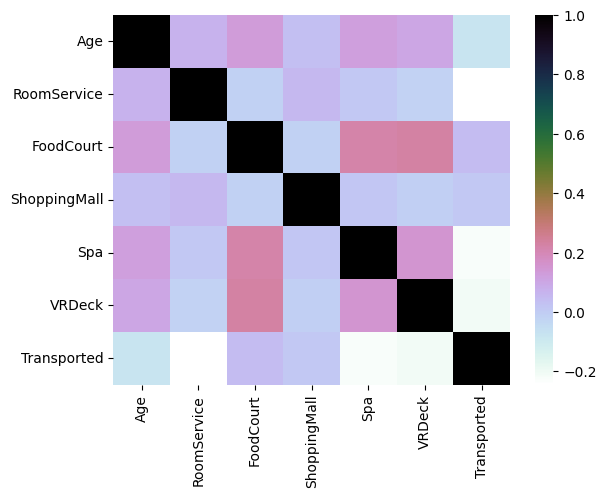

In [ ]:
%%time
sns.heatmap(train.corr(), cmap='cubehelix_r')

## Pandas profiler

In [ ]:
%%time
profile = ProfileReport(train, title="Spaceship Titanic report", explorative=True)

CPU times: user 18.2 ms, sys: 0 ns, total: 18.2 ms
Wall time: 19.4 ms


In [ ]:
%%time
profile.to_file("Spaceship Titanic report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

CPU times: user 19.2 s, sys: 12.5 s, total: 31.6 s
Wall time: 20.8 s


# Preprocessing

## Primary

In [ ]:
%%time
# Boolean to float
train["Transported"] = train["Transported"].astype(float) 
train["CryoSleep"] = train["CryoSleep"].astype(float) 
train["VIP"] = train["VIP"].astype(float) 
sample_submission["Transported"] = sample_submission["Transported"].astype(float)

CPU times: user 5.33 ms, sys: 0 ns, total: 5.33 ms
Wall time: 7.6 ms


In [ ]:
%%time
drop_cols = ["PassengerId", "Cabin", "Name"]
train = train.drop(columns=drop_cols)
test = test.drop(columns=drop_cols)

CPU times: user 2.19 ms, sys: 1.41 ms, total: 3.61 ms
Wall time: 3.54 ms


## Categorical data

In [ ]:
# One-hot encoder

#Home Planet
ohe = OneHotEncoder(sparse=False)
HomePlanet_encoded = ohe.fit_transform(train[['HomePlanet']])
Planet_columns = ohe.get_feature_names_out(['HomePlanet'])
train = pd.concat([train.drop('HomePlanet', axis=1), pd.DataFrame(HomePlanet_encoded, columns=Planet_columns)], axis=1)
test = pd.concat([test.drop('HomePlanet', axis=1), pd.DataFrame(HomePlanet_encoded, columns=Planet_columns)], axis=1)
train = train.drop(columns='HomePlanet_nan')
test = test.drop(columns='HomePlanet_nan')

# CryoSleep
ohe = OneHotEncoder(sparse=False)
CryoSleep_encoded = ohe.fit_transform(train[['CryoSleep']])
CryoSleep_columns = ohe.get_feature_names_out(['CryoSleep'])
train = pd.concat([train.drop('CryoSleep', axis=1), pd.DataFrame(CryoSleep_encoded, columns=CryoSleep_columns)], axis=1)
test = pd.concat([test.drop('CryoSleep', axis=1), pd.DataFrame(CryoSleep_encoded, columns=CryoSleep_columns)], axis=1)
train = train.drop(columns='CryoSleep_nan')
test = test.drop(columns='CryoSleep_nan')

# Destiation
ohe = OneHotEncoder(sparse=False)
Destination_encoded = ohe.fit_transform(train[['Destination']])
Destination_columns = ohe.get_feature_names_out(['Destination'])
train = pd.concat([train.drop('Destination', axis=1), pd.DataFrame(Destination_encoded, columns=Destination_columns)], axis=1)
test = pd.concat([test.drop('Destination', axis=1), pd.DataFrame(Destination_encoded, columns=Destination_columns)], axis=1)
train = train.drop(columns='Destination_nan')
test = test.drop(columns='Destination_nan')

# VIP
ohe = OneHotEncoder(sparse=False)
VIP_encoded = ohe.fit_transform(train[['VIP']])
VIP_columns = ohe.get_feature_names_out(['VIP'])
train = pd.concat([train.drop('VIP', axis=1), pd.DataFrame(VIP_encoded, columns=VIP_columns)], axis=1)
test = pd.concat([test.drop('VIP', axis=1), pd.DataFrame(VIP_encoded, columns=VIP_columns)], axis=1)
train = train.drop(columns='VIP_nan')
test = test.drop(columns='VIP_nan')

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_outp

In [ ]:
train.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_0.0,CryoSleep_1.0,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_0.0,VIP_1.0
0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
1,24.0,109.0,9.0,25.0,549.0,44.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
2,58.0,43.0,3576.0,0.0,6715.0,49.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
3,33.0,0.0,1283.0,371.0,3329.0,193.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
4,16.0,303.0,70.0,151.0,565.0,2.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0


In [ ]:
test.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_0.0,CryoSleep_1.0,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_0.0,VIP_1.0
0,27.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
1,19.0,0.0,9.0,0.0,2823.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
2,31.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
3,38.0,0.0,6652.0,0.0,181.0,585.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
4,20.0,10.0,0.0,635.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0


## NaN values

In [ ]:
# Numerical values imputing
%%time
imputer = IterativeImputer()
train = pd.DataFrame(imputer.fit_transform(train), columns=train.columns)
test = pd.DataFrame(imputer.fit_transform(test), columns=test.columns)
viz(test).style.background_gradient(cmap='cubehelix_r')

CPU times: user 1.01 s, sys: 1.12 s, total: 2.13 s
Wall time: 1.12 s


,data types,Missing,Unique
Age,float64,0,221
RoomService,float64,0,998
FoodCourt,float64,0,1081
ShoppingMall,float64,0,887
Spa,float64,0,1007
VRDeck,float64,0,947
HomePlanet_Earth,float64,0,2
HomePlanet_Europa,float64,0,2
HomePlanet_Mars,float64,0,2
CryoSleep_0.0,float64,0,2


In [ ]:
viz(train).style.background_gradient(cmap='cubehelix_r')

,data types,Missing,Unique
Age,float64,0,200
RoomService,float64,0,1451
FoodCourt,float64,0,1682
ShoppingMall,float64,0,1314
Spa,float64,0,1509
VRDeck,float64,0,1488
Transported,float64,0,2
HomePlanet_Earth,float64,0,2
HomePlanet_Europa,float64,0,2
HomePlanet_Mars,float64,0,2


## Standarization

In [ ]:
# initialize StandardScaler object
scaler = StandardScaler()

# apply scaler to numerical column
test['Age'] = scaler.fit_transform(test[['Age']])
train['Age'] = scaler.fit_transform(train[['RoomService']])
test['RoomService'] = scaler.fit_transform(test[['RoomService']])
train['RoomService'] = scaler.fit_transform(train[['RoomService']])
test['FoodCourt'] = scaler.fit_transform(test[['FoodCourt']])
train['FoodCourt'] = scaler.fit_transform(train[['FoodCourt']])
test['ShoppingMall'] = scaler.fit_transform(test[['ShoppingMall']])
train['ShoppingMall'] = scaler.fit_transform(train[['ShoppingMall']])
test['Spa'] = scaler.fit_transform(test[['Spa']])
train['Spa'] = scaler.fit_transform(train[['Spa']])
test['VRDeck'] = scaler.fit_transform(test[['VRDeck']])
train['VRDeck'] = scaler.fit_transform(train[['VRDeck']])

## Summary

Text(0.5, 1.0, 'Features Correlating with Transported')

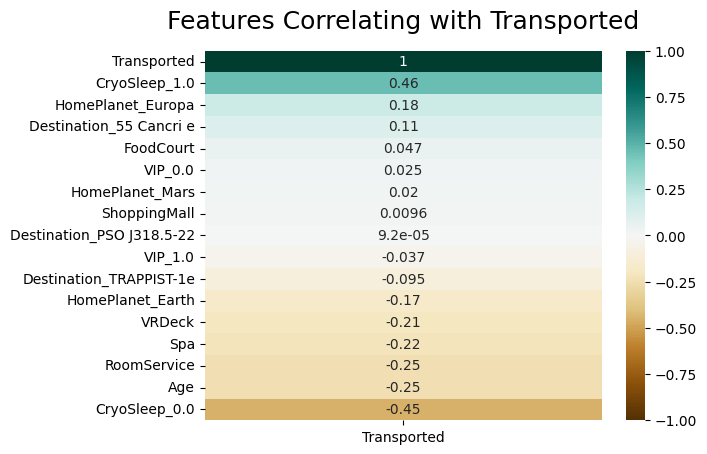

In [ ]:
# Other columns correlation to 'Transported' column
corr_df = train.corr()[['Transported']].sort_values(by='Transported', ascending=False)
heatmap = sns.heatmap(corr_df, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Transported', fontdict={'fontsize':18}, pad=16)

# ML methods implemenation

## Train test split

In [ ]:
%%time
# Data split
target = "Transported"
y = train[target]
X = train[train.columns.drop(target)]

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# Train val split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

CPU times: user 7.09 ms, sys: 16 µs, total: 7.11 ms
Wall time: 9.39 ms


## LightGBM

Gradient boosting library developed by Microsoft Research. Fast learning speed and efficient processing of large datasets thanks to Gradient-Based One-Side Sampling (GOSS) technique, which uses gradients to select samples that are more important for updating the model. This technique allows for reducing the number of samples and increasing learning speed. LightGBM operates based on decision trees.

In [ ]:
# Definition of optimalization function
def lgb(trial):
  # Hiperparameters selection
    param = {
        'objective': 'binary',
        'metric': 'binary_logloss',
        'verbosity': -1,
        'boosting_type': 'gbdt',
        'num_leaves': trial.suggest_int('num_leaves', 5, 50),
        'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 1.0),
        'n_estimators': trial.suggest_int('n_estimators', 50, 500),
        'max_depth': trial.suggest_int('max_depth', 1, 10),
        'min_child_samples': trial.suggest_int('min_child_samples', 1, 20),
        'min_child_weight': trial.suggest_loguniform('min_child_weight', 1e-5, 1),
        'subsample': trial.suggest_uniform('subsample', 0.1, 1),
        'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.1, 1),
        'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-5, 10),
        'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-5, 10),
        'random_state': 42
    }
    
    # Model definition with chosen hiperparameters
    lgb_model = LGBMClassifier(**param)
    
    # Model training
    lgb_model.fit(X_train, y_train, eval_set=[(X_val, y_val)], verbose=False)
    
    # Prediction
    y_pred = lgb_model.predict(X_val)
    score = accuracy_score(y_val, y_pred)
    
    return score

# Optuna optimalization study creation
study = optuna.create_study(direction='maximize')

# Hiperparameters optimalization
study.optimize(lgb, n_trials=100)

# Creating LightGBM model with best params
best_params = study.best_params
lgb_model = LGBMClassifier(**best_params)

lgb_model.fit(X_train, y_train, eval_set=[(X_val, y_val)], verbose=False)

[I 2023-05-04 19:07:24,894] A new study created in memory with name: no-name-0fcb57b2-3c93-4cd6-b293-85785f9a0040
<ipython-input-28-392b58d7b779>:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 1.0),
<ipython-input-28-392b58d7b779>:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'min_child_weight': trial.suggest_loguniform('min_child_weight', 1e-5, 1),
<ipython-input-28-392b58d7b779>:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest

LGBMClassifier(colsample_bytree=0.1374349447792354,
               learning_rate=0.2925001993856005, max_depth=5,
               min_child_samples=16, min_child_weight=1.4306717507898094e-05,
               n_estimators=170, num_leaves=25, reg_alpha=2.681453082408246,
               reg_lambda=1.7581656949954136e-05, subsample=0.4104271755235824)

Accuracy score:
0.7929447852760736
Reacall score:
0.8253477588871716
F1-score: 0.7982062780269058
ROC AUC: 0.8769146441014495


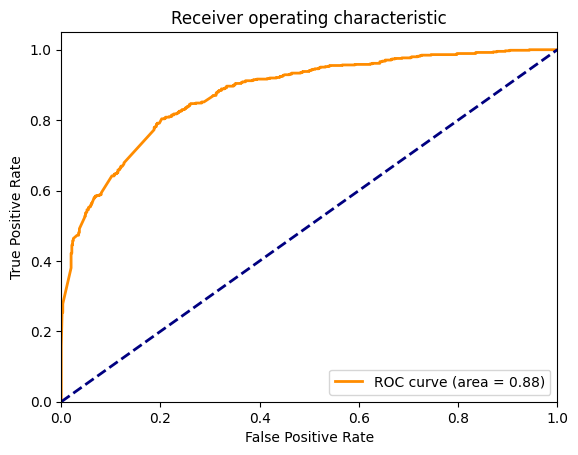

In [ ]:
def evaluate_model(model, X_test, y_test):
    # Test set prediction
    y_pred = model.predict(X_test)
    
    # Calculate and show accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy score:")
    print(accuracy)

    # Calculate and show recall score
    recall =recall_score(y_test, y_pred)
    print("Reacall score:")
    print(recall)
    
    # Calculate and show F1-score
    f1 = f1_score(y_test, y_pred)
    print("F1-score:", f1)
    
    # Calculate and show ROC curve and AUC
    y_prob = model.predict_proba(X_test)[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    print("ROC AUC:", roc_auc)
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()
lgb_score = evaluate_model(lgb_model, X_test, y_test)

## XGBoost

Also based on the gradient boosting algorithm. XGBoost operates based on decision trees, but differs from other gradient boosting libraries in that it incorporates regularization, which helps prevent overfitting. Additionally, XGBoost uses the Gradient-Based Sampling (GBDT) technique.

In [ ]:
# Definition of optimalization function
def xgb(trial):
    # Hiperparameters selection
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 200),
        'max_depth': trial.suggest_int('max_depth', 2, 10),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.5),
        'subsample': trial.suggest_uniform('subsample', 0.1, 1),
        'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.1, 1),
        'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-8, 1.0),
        'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-8, 1.0),
        'eval_metric': 'logloss',
        'random_state': 42
    }
    
    # Model definition with chosen hiperparameters
    model = XGBClassifier(**params)
    
    # Model training
    model.fit(X_train, y_train, eval_set=[(X_val, y_val)], early_stopping_rounds=10, verbose=False)
    
    # Prediction
    y_pred = model.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)
    
    return accuracy

# Optuna optimalization study creation
study = optuna.create_study(direction='maximize')

# Hiperparameters optimalization
study.optimize(xgb, n_trials=100)

# Creating XGBoost model with best params
best_params = study.best_params
xgb_model = XGBClassifier(**best_params)

xgb_model.fit(X_train, y_train, eval_set=[(X_val, y_val)], early_stopping_rounds=10, verbose=False)

[I 2023-05-04 19:07:49,878] A new study created in memory with name: no-name-91bff541-ae56-4bc2-a4c0-b91c10f51cea
<ipython-input-30-0520df15f9f7>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.5),
<ipython-input-30-0520df15f9f7>:8: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'subsample': trial.suggest_uniform('subsample', 0.1, 1),
<ipython-input-30-0520df15f9f7>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
 

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8451613435256188, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=8.587232298319079e-08, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.033628683911408115, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=133, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

Accuracy score:
0.7929447852760736
Reacall score:
0.8315301391035549
F1-score: 0.799405646359584
ROC AUC: 0.8715956328117833


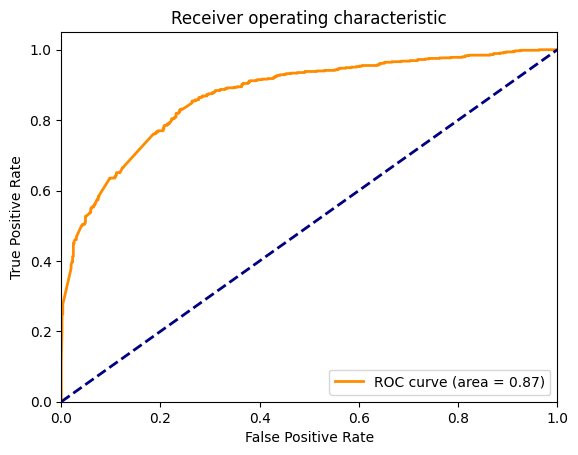

In [ ]:
xgb_score = evaluate_model(xgb_model, X_test, y_test)

## CatBoost

Also based on the gradient boosting algorithm. The library was developed by Yandex and is particularly effective in handling categorical variables. CatBoost operates based on decision trees, but differs from other gradient boosting libraries in that it automatically handles categorical variables, meaning they do not need to be manually encoded or replaced with numerical values. Additionally, CatBoost applies the Symmetric Tree Re-Weighting (STR) technique, which allows for better balance in building decision trees.

In [ ]:
# Definition of optimalization function
def cat(trial):
    # Hiperparameters selection
    params = {
        'iterations': trial.suggest_int('iterations', 100, 1000),
        'depth': trial.suggest_int('depth', 4, 10),
        'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 0.3),
        'random_strength': trial.suggest_int('random_strength', 1, 100),
        'bagging_temperature': trial.suggest_uniform('bagging_temperature', 0.0, 1.0),
        'border_count': trial.suggest_int('border_count', 1, 255),
        'task_type': 'GPU',
        'loss_function': 'Logloss',
        'early_stopping_rounds': 50,
        'verbose': False
    }

    # Model definition with chosen hiperparameters
    model = cb.CatBoostClassifier(**params)

    # Model training
    model.fit(X_train, y_train, eval_set=(X_val, y_val),early_stopping_rounds=10,  verbose=False)

    # Prediction
    y_pred = model.predict(X_val)
    accuracy = accuracy_score(y_val, y_val)
    
    return accuracy

# Optuna optimalization study creation
study = optuna.create_study(direction='maximize')

# Hiperparameters optimalization
study.optimize(cat, n_trials=100)

# Creating CatBoost model with best params
best_params = study.best_params
cat_model = cb.CatBoostClassifier(**best_params)

cat_model.fit(X_train, y_train, eval_set=[(X_val, y_val)], early_stopping_rounds=10, verbose=False)

[I 2023-05-04 19:09:27,272] A new study created in memory with name: no-name-3ac91caa-5ccd-43b0-afaf-3ce95a7549f8
<ipython-input-32-ebd5059641cb>:7: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 0.3),
<ipython-input-32-ebd5059641cb>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'bagging_temperature': trial.suggest_uniform('bagging_temperature', 0.0, 1.0),
[I 2023-05-04 19:09:28,219] Trial 0 finished with value: 1.0 and parameters: {'iterations': 358, 'depth': 6, 'learning_rate': 0.21302164587202205, 'random_strength': 99, 'bagging_temperature': 0.1362122518559532, 'border_count': 89}. B

Accuracy score:
0.7975460122699386
Reacall score:
0.8315301391035549
F1-score: 0.8029850746268657
ROC AUC: 0.8789319161849916


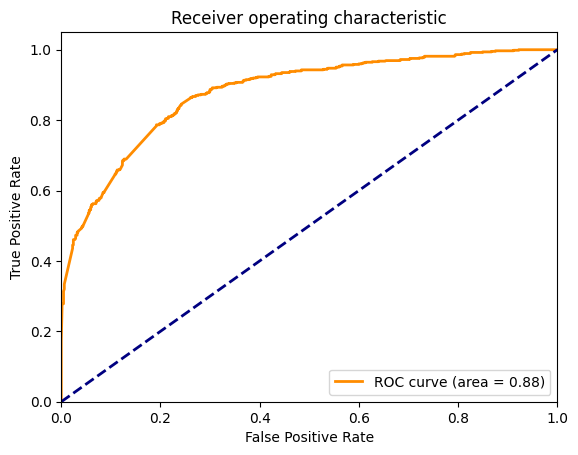

In [ ]:
cat_score = evaluate_model(cat_model, X_test, y_test)

## Summary

 LightGBM score 
Accuracy score:
0.7929447852760736
Reacall score:
0.8253477588871716
F1-score: 0.7982062780269058
ROC AUC: 0.8769146441014495


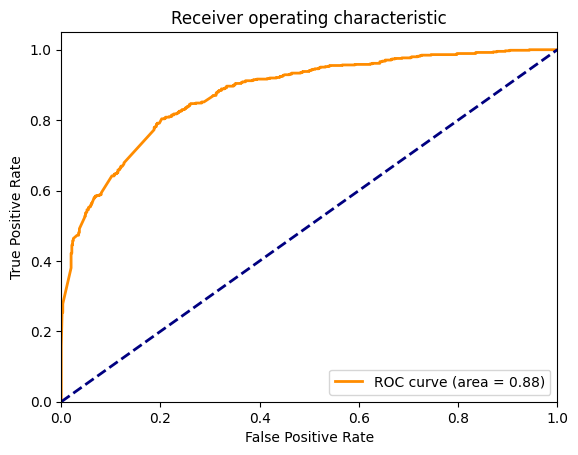


 XGBoost score 
Accuracy score:
0.7929447852760736
Reacall score:
0.8315301391035549
F1-score: 0.799405646359584
ROC AUC: 0.8715956328117833


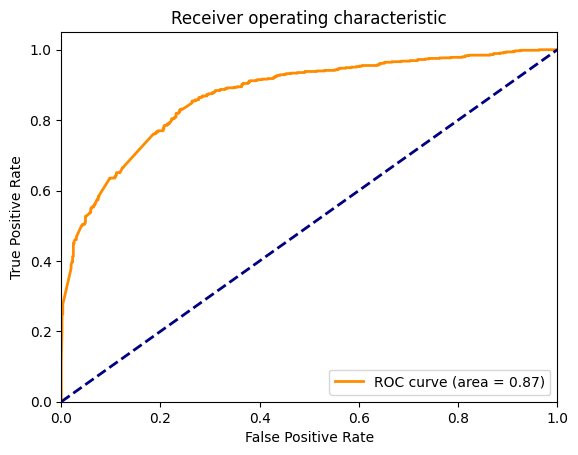


 CatBoost score 
Accuracy score:
0.7975460122699386
Reacall score:
0.8315301391035549
F1-score: 0.8029850746268657
ROC AUC: 0.8789319161849916


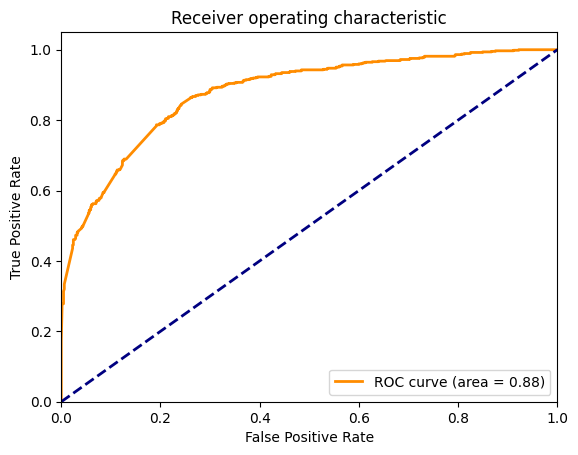

In [ ]:
# All models results summary
print("\033[1m\033[36m LightGBM score \033[0m")
lgb_score = evaluate_model(lgb_model, X_test, y_test)
print()
print("\033[1m\033[36m XGBoost score \033[0m")
xgb_score = evaluate_model(xgb_model, X_test, y_test)
print()
print("\033[1m\033[36m CatBoost score \033[0m")
cat_score = evaluate_model(cat_model, X_test, y_test)

# PyTorch

## Logistic regression

In [ ]:
# Model definition
class LogisticRegression(nn.Module):
    def __init__(self, input_size):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(input_size, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.linear(x)
        x = self.sigmoid(x)
        return x

# Dataset definition
class CustomDataset(torch.utils.data.Dataset):
    def __init__(self, X, y):
        self.X = torch.Tensor(X)
        self.y = torch.Tensor(y)

    def __getitem__(self, index):
        return self.X[index], self.y[index]

    def __len__(self):
        return len(self.X)


# Training model
def train_model(model, train_loader, optimizer, criterion):
    model.train()
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

# Testing model
def test_model(model, test_loader):
    model.eval()
    with torch.no_grad():
        correct = 0
        total = 0
        for inputs, labels in test_loader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accuracy = 100 * correct / total
    return accuracy

# Hiperparameters definition
input_size = X_train.shape[1]
output_size = 2
learning_rate = 0.001
num_epochs = 100
batch_size = 32

## K-Fold

In [ ]:
# K-fold definition
kf = KFold(n_splits=5, shuffle=True)
train_acc_list = []
val_acc_list = []

In [ ]:
# K-fold iterations
for train_index, val_index in kf.split(X_train):
    # Dataloader creation
    train_dataset = CustomDataset(X_train[train_index], y_train[train_index])
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_dataset = CustomDataset(X_train[val_index], y_train[val_index])
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=True)

    # Inicjalizacja modelu, optymalizatora i funkcji straty
    model = LogisticRegression(input_size, output_size)
    optimizer = optim.SGD(model.parameters(), lr=learning_rate)
    criterion = nn.CrossEntropyLoss()

    # Trenowanie modelu przez num_epochs
    for epoch in range(num_epochs):
        train_model(model, train_loader, optimizer, criterion)

    # Testowanie modelu na zbiorze trenującym i walidującym
    train_acc = test_model(model, train_loader)
    val_acc = test_model(model, val_loader)

    # Zapisanie wyników dla danego foldu
    train_acc_list.append(train_acc)
    val_acc_list.append(val_acc)

# Obliczenie średniej i odchylenia standardowego wyników dla każdej metryki
train_acc_mean = sum(train_acc_list) / len(train_acc_list)
train_acc_std

KeyError: ignored